In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 1
!hostname
!pwd

dv004.bridges2.psc.edu
/ocean/projects/asc170022p/mtragoza/mre-pinn/MICCAI-2023


In [2]:
import sys, os
import numpy as np
import pandas as pd

sys.path.append('..')
%aimport mre_pinn

sys.path.append('../../param_search')
%aimport param_search
ps = param_search

Using backend: pytorch



# MICCAI 2023 patient experiment

In [3]:
%pwd

'/ocean/projects/asc170022p/mtragoza/mre-pinn/MICCAI-2023'

In [4]:
template = '''\
#!/bin/bash
#SBATCH --job-name={job_name}
#SBATCH --account=asc170022p
#SBATCH --partition=GPU-shared
#SBATCH --gres=gpu:1
#SBATCH -x v034
#SBATCH --time=48:00:00
#SBATCH -o %J.stdout
#SBATCH -e %J.stderr
#SBATCH --mail-type=all

hostname
pwd
module load anaconda3
conda activate /ocean/projects/asc170022p/mtragoza/mambaforge/envs/MRE-PINN

python ../../../train.py \\
    --xarray_dir {xarray_dir} \\
    --example_id {example_id} \\
    --frequency {frequency} \\
    --noise_ratio {noise_ratio} \\
    --omega {omega} \\
    --polar_input {polar_input} \\
    --savgol_filter {savgol_filter} \\
    --pde_name {pde_name} \\
    --pde_warmup_iters 10000 \\
    --pde_step_iters 5000 \\
    --pde_step_factor 10 \\
    --pde_init_weight {pde_init_weight} \\
    --pde_loss_weight {pde_loss_weight} \\
    --a_loss_weight {a_loss_weight} \\
    --anatomical {anatomical} \\
    --n_iters {n_iters} \\
    --save_prefix {job_name}    
'''
name = 'train_{data_name}_{example_id}_{omega}_{pde_name}_{a_loss_weight:.0e}'

param_space = ps.ParamSpace(
    pde_name=['hetero'],
    a_loss_weight=[0, 1, 1e-2, 1e-4], # 1e-1, 1e-3],
    data_name='patient',
    xarray_dir='../../../data/NAFLD/v4',
    example_id=['0006', '0020', '0024', '0029', '0043', '0047', '0126', '0135', '0155', '0164', '0172', '0173', '0210', '0213', '0219', '0222', '0234', '0235', '0291', '0344', '0378', '0384', '0395', '0401', '0415', '0457', '0461', '0491', '0492', '0496', '0509', '0510', '0516', '0525', '0564', '0604', '0612', '0615', '0628', '0639', '0648', '0650', '0653', '0655', '0659', '0693', '0704', '0717', '0727', '0734', '0737', '0740', '0747', '0748', '0898', '0900', '0929', '0931', '0932', '0940', '0954', '0964', '0965', '0979', '0989', '0995', '1028', '1033', '1039', '1045', '1075', '1076', '1077', '1083', '1103', '1106', '1108', '1110', '1119', '1121', '1123', '1134', '1144', '1149', '1205', '1207', '1215', '1217', '1230', '1261', '1271', '1296', '1303', '1311', '1329', '1337', '1341', '1343', '1344', '1382', '1395', '1400', '1404', '1417', '1426', '1427', '1433', '1435', '1448', '1453', '1456', '1464', '1671', '1679', '1694', '1699', '1706', '1712', '1714', '1715', '1720', '1722', '1727', '1736', '1748', '1785', '1786', '1790', '1791', '1793', '1795', '1798', '1806', '1807', '1819', '1829', '1839', '1843', '1851', '1853', '1896', '1899', '1903', '1917', '1935', '1940', '1948', '1967', '1979', '1980', '2001', '2007', '2029', '2034', '2046'],
    frequency=40,
    noise_ratio=0.0,
    omega=[30],
    polar_input=1,
    savgol_filter=[0],
    pde_init_weight=1e-18,
    pde_loss_weight=1e-16,
    anatomical=True,
    n_iters=100000,
)

len(param_space)

620

In [5]:
for p in list(param_space)[:24]:
    print(name.format(**p))

train_patient_0006_30_hetero_0e+00
train_patient_0020_30_hetero_0e+00
train_patient_0024_30_hetero_0e+00
train_patient_0029_30_hetero_0e+00
train_patient_0043_30_hetero_0e+00
train_patient_0047_30_hetero_0e+00
train_patient_0126_30_hetero_0e+00
train_patient_0135_30_hetero_0e+00
train_patient_0155_30_hetero_0e+00
train_patient_0164_30_hetero_0e+00
train_patient_0172_30_hetero_0e+00
train_patient_0173_30_hetero_0e+00
train_patient_0210_30_hetero_0e+00
train_patient_0213_30_hetero_0e+00
train_patient_0219_30_hetero_0e+00
train_patient_0222_30_hetero_0e+00
train_patient_0234_30_hetero_0e+00
train_patient_0235_30_hetero_0e+00
train_patient_0291_30_hetero_0e+00
train_patient_0344_30_hetero_0e+00
train_patient_0378_30_hetero_0e+00
train_patient_0384_30_hetero_0e+00
train_patient_0395_30_hetero_0e+00
train_patient_0401_30_hetero_0e+00


In [ ]:
%autoreload

expt_names = [
    '2023-2-16_patient_anat',  # a_loss_weight
    '2023-2-18_patient_anat',  # move queued jobs to GPU-shared
    '2023-2-20_patient_anat2', # expanded a_loss_weight range
    '2023-2-26_patient_FEM',   # just the new FEM baselines
    '2023-2-28_patient_anat3', # fix v034 errors- Helmholtz
    '2023-3-2_patient_anat',   # fix v034 errors- hetero
]
expt_name = expt_names[-1]

#jobs = ps.submit(template, name, list(param_space), work_dir=expt_name, verbose=True)
#jobs.to_csv(f'{expt_name}.jobs')

#jobs = pd.concat([pd.read_csv(f'{e}.jobs', index_col=0) for e in expt_names])
jobs = pd.read_csv(f'{expt_name}.jobs', index_col=0)

jobs

In [ ]:
%autoreload
status_cols = ['job_name', 'job_state', 'node_id', 'runtime', 'stdout', 'stderr']
status = ps.status(jobs, parse_stdout=True, parse_stderr=True)
status[status_cols]

In [ ]:
def get_error_type(e):
    for error_type in [
        'CANCELLED',
        'python: command not found',
        'Unexpected error from cudaGetDeviceCount()'
    ]:
        if error_type in e:
            return error_type
    return e

status['has_stderr_file'] = status.stderr.map(lambda x: not (isinstance(x, float) and np.isnan(x)))
status['has_stderr'] = ~status.stderr.isnull() & ~(status.stderr == '')
status['error'] = status.stderr.astype(str).map(get_error_type)

status.fillna('DONE').groupby(['job_state', 'has_stderr_file', 'has_stderr', 'error'])[['job_name']].count()

In [ ]:
status[status.has_stderr].groupby(['error', 'stdout'])[['job_name']].count()

In [6]:
jobs = pd.concat([
    pd.read_csv(f'2023-2-28_patient_anat3.jobs', index_col=0), # helmholtz
    pd.read_csv(f'2023-3-2_patient_anat.jobs', index_col=0),   # hetero
])
metrics = ps.metrics(jobs)

train_patient_1261_30_helmholtz_1e+00 No objects to concatenate
train_patient_1785_30_helmholtz_1e+00 No objects to concatenate
train_patient_1786_30_helmholtz_1e+00 No objects to concatenate
train_patient_1790_30_helmholtz_1e+00 No objects to concatenate
train_patient_1791_30_helmholtz_1e+00 No objects to concatenate
train_patient_0384_30_helmholtz_1e-02 No objects to concatenate
train_patient_0509_30_helmholtz_1e-04 No objects to concatenate
train_patient_0043_30_hetero_1e-04 No objects to concatenate


In [7]:
param_cols = ['pde_name', 'example_id', 'omega', 'a_loss_weight', 'savgol_filter'] # experimental parameters
index_cols = ['variable_name', 'spatial_frequency_bin', 'spatial_region'] # metric identifiers
metric_cols = ['MSAV', 'PSD', 'MAV', 'R'] # metric values

def metric_map(tup):
    metric_name, var_name = tup
    new_col_name = f'{var_name}_{metric_name}'
    new_col_name = new_col_name.replace('diff_MSAV', 'pred_MSAE')
    new_col_name = new_col_name.replace('pde_diff_MSAV', 'PDE_MSAE')
    new_col_name = new_col_name.replace('diff_MAV', 'pred_MAD')
    return new_col_name

def format_metrics(metrics):
    metrics = metrics[metrics.iteration == 100e3]
    metrics = metrics.groupby(param_cols + index_cols, sort=False)[metric_cols].mean()
    metrics = metrics.unstack(level=[len(param_cols)])
    metrics.columns = [metric_map(t) for t in metrics.columns.to_flat_index()]
    return metrics
    
metrics = format_metrics(metrics)
metrics

a_pred_MSAV  \
pde_name  example_id omega a_loss_weight savgol_filter spatial_frequency_bin spatial_region                 
helmholtz 6          30    0.0000        0             all                   all             31189.904757   
                                                                             0.0                      NaN   
                                                                             1.0                      NaN   
                                                       1.0                   all                      NaN   
                                                       2.0                   all                      NaN   
...                                                                                                   ...   
hetero    2046       30    0.0001        0             6.0                   all                      NaN   
                                                       7.0                   all                      NaN   
                                                       8.0                   all                      NaN   
                                                       9.0                   all                      NaN   
                                                       10.0                  all                      NaN   

                                                                                              a_pred_MSAE  \
pde_name  example_id omega a_loss_weight savgol_filter spatial_frequency_bin spatial_region                 
helmholtz 6          30    0.0000        0             all                   all             26128.545977   
                                                                             0.0                      NaN   
                                                                             1.0                      NaN   
                                                       1.0                   all                      NaN   
                                                       2.0                   all                      NaN   
...                                                                                                   ...   
hetero    2046       30    0.0001        0             6.0                   all                      NaN   
                                                       7.0                   all                      NaN   
                                                       8.0                   all                      NaN   
                                                       9.0                   all                      NaN   
                                                       10.0                  all                      NaN   

                                                                                              a_true_MSAV  \
pde_name  example_id omega a_loss_weight savgol_filter spatial_frequency_bin spatial_region                 
helmholtz 6          30    0.0000        0             all                   all             19750.975778   
                                                                             0.0                      NaN   
                                                                             1.0                      NaN   
                                                       1.0                   all                      NaN   
                                                       2.0                   all                      NaN   
...                                                                                                   ...   
hetero    2046       30    0.0001        0             6.0                   all                      NaN   
                                                       7.0                   all                      NaN   
                                                       8.0                   all                      NaN   
                                                       9.0 

<IPython.core.display.Javascript object>


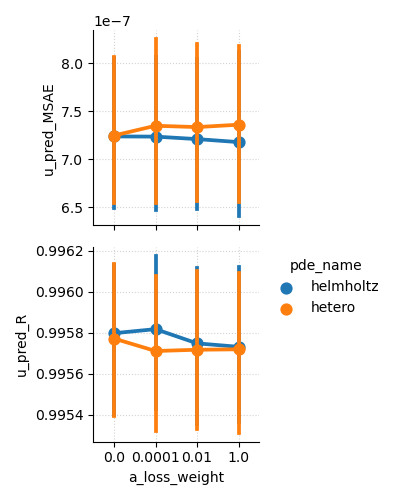

In [8]:
m = metrics.reset_index()

fig = ps.plot(
    m[(m.spatial_region == 'all') & (m.spatial_frequency_bin == 'all')],
    x=['a_loss_weight'],
    y=['u_pred_MSAE', 'u_pred_R'],
    hue='pde_name',
    height=2.5,
    width=4,
    legend=True,
    tight=True
)

<IPython.core.display.Javascript object>


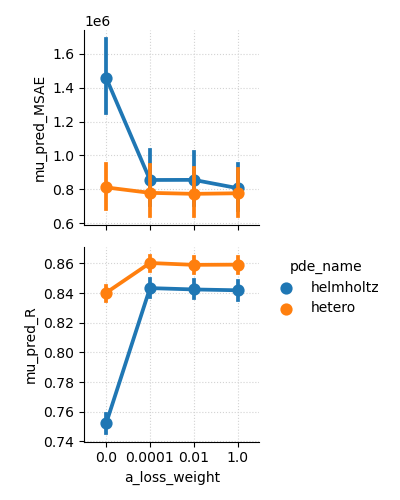

In [9]:
fig = ps.plot(
    m[(m.spatial_region == 'all') & (m.spatial_frequency_bin == 'all')],
    x=['a_loss_weight'],
    y=['mu_pred_MSAE', 'mu_pred_R'],
    hue='pde_name',
    height=2.5,
    width=4,
    legend=True,
    tight=True
)

In [10]:
m['pde_abbrev'] = m.pde_name.map({'helmholtz': 'HH', 'hetero': 'het'}.__getitem__)
m['method'] = 'PINN-' + m['pde_abbrev']

ahi_m = m[m.pde_name == 'helmholtz'].copy()
ahi_m['method'] = 'AHI'
for col in m.columns:
    if col.startswith('direct'):
        ahi_m[col.replace('direct', 'mu')] = m[col]
        
fem_m = m.copy()
fem_m['method'] = 'FEM-' + m['pde_abbrev']
for col in m.columns:
    if col.startswith('fem'):
        fem_m[col.replace('fem', 'mu')] = m[col]
        
mm = pd.concat([ahi_m, fem_m, m])

method_order = ['AHI', 'FEM-HH', 'FEM-het', 'PINN-HH', 'PINN-het']
mm['method_index'] = mm['method'].map(method_order.index)
mm = mm.sort_values('method_index')

In [11]:
import matplotlib as mpl
pct_format = mpl.ticker.PercentFormatter()

mm['mu_pred_MSAE_relative'] = mm['mu_pred_MSAE'] / mm['mu_true_MSAV'] * 100
mm['mu_pred_MAD_relative']  = mm['mu_pred_MAD']  / mm['mu_true_MAV'] * 100

In [12]:
%autoreload
import seaborn as sns
import matplotlib.pyplot as plt

colors = ps.results.get_color_palette(10, type='deep', min_val=0)
blue, orange, green, red, purple, brown, pink, gray, yellow, cyan = colors

colors = [red, yellow, green, cyan, blue]
sns.set_palette(colors)
colors = sns.color_palette()
colors

[(0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451),
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)]

In [13]:
%pwd

'/ocean/projects/asc170022p/mtragoza/mre-pinn/MICCAI-2023'

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[group_name] = df[group_cols].astype(str).agg(sep.join, axis=1)



<IPython.core.display.Javascript object>


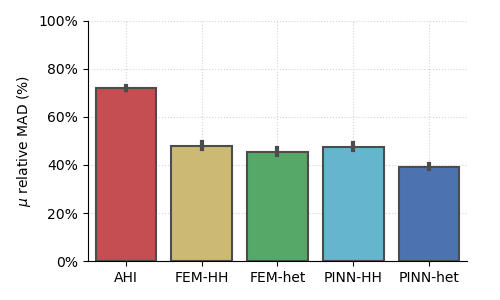

In [14]:
fig = ps.plot(
    mm[(mm.spatial_region == '1.0') & (mm.a_loss_weight == 0.0)],
    x='method',
    y='mu_pred_MAD_relative',
    height=3,
    width=5,
    legend=True,
    tight=True,
    plot_func=ps.results.barplot
)
fig.axes[0].set_xlabel(None)
fig.axes[0].set_ylabel('$\mu$ relative MAD (%)')
fig.axes[0].set_ylim(0, 100)
fig.axes[0].yaxis.set_major_formatter(pct_format)
fig.tight_layout()

for i, patch in enumerate(fig.axes[0].patches):
    plt.setp(patch, facecolor=colors[i])   

for ext in ['png', 'pdf']:
    fig.savefig(f'images/patient_method_MAD_bar_plot.{ext}', bbox_inches='tight', dpi=200)

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[group_name] = df[group_cols].astype(str).agg(sep.join, axis=1)



<IPython.core.display.Javascript object>


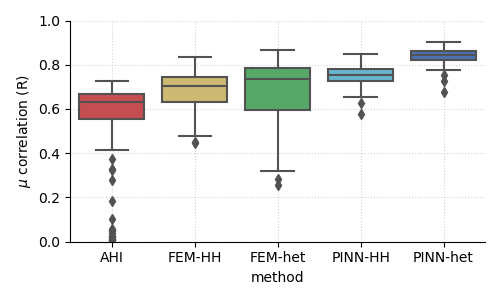

5



In [22]:
fig = ps.plot(
    mm[
        (mm.spatial_region == 'all') &
        (mm.spatial_frequency_bin == 'all') &
        (mm.a_loss_weight == 0.0)
    ],
    x='method',
    hue='method',
    y='mu_pred_R',
    height=3,
    width=5,
    legend=False,
    tight=True,
    plot_func=sns.boxplot
)
fig.axes[0].set_ylabel('$\mu$ correlation (R)')
fig.axes[0].set_ylim([0, 1])
fig.tight_layout()

print(len(colors))
print()
for i, patch in enumerate(fig.axes[0].patches):
    plt.setp(patch, facecolor=colors[(i-1)%5])

for ext in ['png', 'pdf']:
    fig.savefig(f'images/patient_method_R_bar_plot.{ext}', bbox_inches='tight', dpi=200)

In [23]:
mm[
    (mm.spatial_region == 'all') &
    (mm.spatial_frequency_bin == 'all') &
    (mm.a_loss_weight == 0.0) & 
    ~mm.savgol_filter
].groupby('method')[['mu_pred_R']].describe()

mu_pred_R                                                    \
             count      mean       std       min       25%       50%   
method                                                                 
AHI          155.0  0.566515  0.183692  0.006629  0.553442  0.631414   
FEM-HH       153.0  0.679445  0.084104  0.448210  0.630801  0.702771   
FEM-het      153.0  0.675640  0.145406  0.255190  0.594697  0.736643   
PINN-HH      155.0  0.752165  0.040121  0.576805  0.728400  0.755523   
PINN-het     155.0  0.840237  0.031948  0.675076  0.821483  0.843804   

                              
               75%       max  
method                        
AHI       0.669912  0.724919  
FEM-HH    0.743402  0.834628  
FEM-het   0.783431  0.868569  
PINN-HH   0.779048  0.847216  
PINN-het  0.862318  0.902726

In [24]:
mm['a_loss_weight_mod'] = mm['a_loss_weight'].copy()
mm.loc[mm.a_loss_weight == 0, 'a_loss_weight_mod'] = 1e-8 # for log-scale plotting purposes

<IPython.core.display.Javascript object>


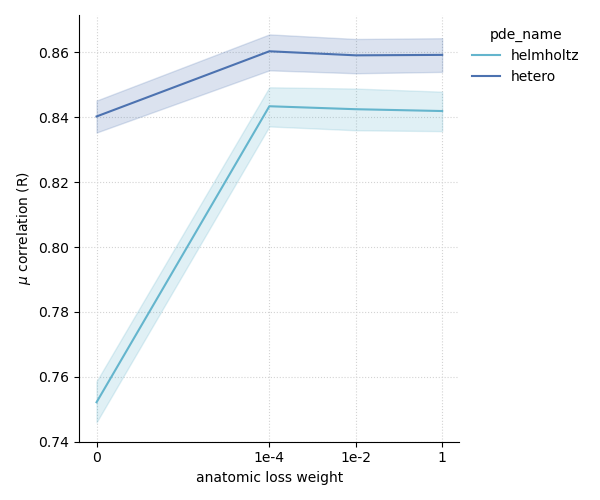

In [25]:
sns.set_palette(colors[-2:])

fig = ps.plot(
    mm[mm.spatial_region.isin({'all'}) & mm.spatial_frequency_bin.isin({'all'}) & mm.method.str.startswith('PINN')], 
    x='a_loss_weight_mod',
    y='mu_pred_R',
    hue='pde_name',
    height=5,
    width=6,
    legend=True,
    tight=True,
    plot_func=sns.lineplot
)
fig.axes[0].set_ylabel('$\mu$ correlation (R)')
fig.axes[0].set_xlabel('anatomic loss weight')
fig.axes[0].set_xscale('log')
fig.axes[0].set_xticks([1e-8, 1e-4, 1e-2, 1e0])
fig.axes[0].set_xticklabels(['0', '1e-4', '1e-2', '1'])
fig.tight_layout()

for ext in ['png', 'pdf']:
    fig.savefig(f'images/patient_anat_bar_plot.{ext}', bbox_inches='tight', dpi=200)

In [26]:
# descriptive stats
d = mm[
    mm.spatial_region.isin({'all'}) &
    mm.spatial_frequency_bin.isin({'all'}) &
    (mm.a_loss_weight == 0)
].groupby(['method'])[['mu_pred_R']].describe()

d['mu_pred_R', 'IQR'] = d['mu_pred_R', '75%'] - d['mu_pred_R', '25%']
d

mu_pred_R                                                    \
             count      mean       std       min       25%       50%   
method                                                                 
AHI          155.0  0.566515  0.183692  0.006629  0.553442  0.631414   
FEM-HH       153.0  0.679445  0.084104  0.448210  0.630801  0.702771   
FEM-het      153.0  0.675640  0.145406  0.255190  0.594697  0.736643   
PINN-HH      155.0  0.752165  0.040121  0.576805  0.728400  0.755523   
PINN-het     155.0  0.840237  0.031948  0.675076  0.821483  0.843804   

                                        
               75%       max       IQR  
method                                  
AHI       0.669912  0.724919  0.116470  
FEM-HH    0.743402  0.834628  0.112601  
FEM-het   0.783431  0.868569  0.188734  
PINN-HH   0.779048  0.847216  0.050648  
PINN-het  0.862318  0.902726  0.040834

In [27]:
# descriptive stats
mm[
    mm.spatial_region.isin({'all'}) &
    mm.spatial_frequency_bin.isin({'all'}) &
    mm.method.str.startswith('PINN')
] \
    .groupby(['pde_name', 'a_loss_weight'])[['mu_pred_R']].describe()

mu_pred_R                                          \
                            count      mean       std       min       25%   
pde_name  a_loss_weight                                                     
helmholtz 0.0000            155.0  0.752165  0.040121  0.576805  0.728400   
          0.0001            154.0  0.843386  0.039254  0.718338  0.821607   
          0.0100            154.0  0.842472  0.040483  0.720549  0.819936   
          1.0000            150.0  0.841910  0.040333  0.684437  0.817634   
hetero    0.0000            155.0  0.840237  0.031948  0.675076  0.821483   
          0.0001            154.0  0.860326  0.034629  0.752495  0.837541   
          0.0100            155.0  0.859077  0.034482  0.773236  0.833469   
          1.0000            155.0  0.859213  0.033058  0.780760  0.835781   

                                                       
                              50%       75%       max  
pde_name  a_loss_weight                                
helmholtz 0.0000         0.755523  0.779048  0.847216  
          0.0001         0.849677  0.871976  0.911119  
          0.0100         0.851879  0.874019  0.914914  
          1.0000         0.851468  0.872231  0.914003  
hetero    0.0000         0.843804  0.862318  0.902726  
          0.0001         0.866877  0.886468  0.917543  
          0.0100         0.865769  0.885963  0.917287  
          1.0000         0.867784  0.884524  0.919423

In [28]:
# two-sample t tests
from scipy.stats import ttest_ind, ttest_rel

for method, df in mm[
    mm.spatial_region.isin({'all'}) &
    mm.spatial_frequency_bin.isin({'all'}) &
    mm.method.str.startswith('PINN')
].groupby('method'):
    print(method)
    
    df = df.set_index('example_id')
    sample1 = df[df.a_loss_weight == 0]
    sample2 = df[df.a_loss_weight == 1e-4]
    sample1 = sample1.loc[sample1.index.intersection(sample2.index)]
    sample2 = sample2.loc[sample1.index.intersection(sample2.index)]
    res = ttest_rel(sample2.mu_pred_R, sample1.mu_pred_R, alternative='greater')
    print(res)
    
    sample1 = df[df.a_loss_weight == 1e-4]
    sample2 = df[df.a_loss_weight == 1e-2]
    sample1 = sample1.loc[sample1.index.intersection(sample2.index)]
    sample2 = sample2.loc[sample1.index.intersection(sample2.index)]
    res = ttest_rel(sample2.mu_pred_R, sample1.mu_pred_R, alternative='two-sided')
    print(res)
    
    sample1 = df[df.a_loss_weight == 1e-4]
    sample2 = df[df.a_loss_weight == 1]
    sample1 = sample1.loc[sample1.index.intersection(sample2.index)]
    sample2 = sample2.loc[sample1.index.intersection(sample2.index)]
    res = ttest_rel(sample2.mu_pred_R, sample1.mu_pred_R, alternative='two-sided')
    print(res)

PINN-HH
Ttest_relResult(statistic=24.924232035607677, pvalue=4.851320278250981e-56)
Ttest_relResult(statistic=-0.6632415846271383, pvalue=0.5081804432006845)
Ttest_relResult(statistic=-0.5237796917132885, pvalue=0.6012152349684743)
PINN-het
Ttest_relResult(statistic=8.270846428871767, pvalue=3.0103252666468745e-14)
Ttest_relResult(statistic=-1.1988898229691012, pvalue=0.2324243415775626)
Ttest_relResult(statistic=-1.3783252597054603, pvalue=0.17011508304538708)


<IPython.core.display.Javascript object>


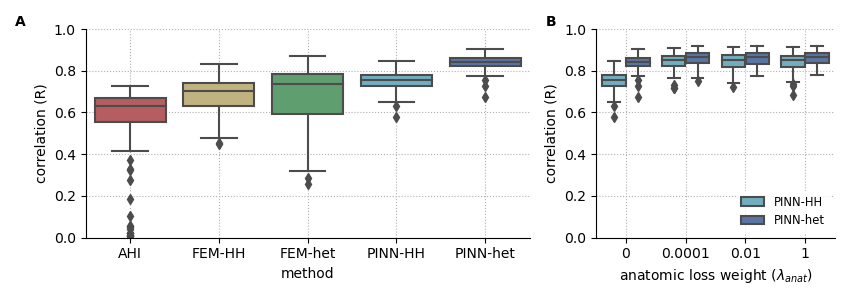

In [57]:
%autoreload
fig, ax = plt.subplots(1, 2, figsize=(8.5, 3), width_ratios=(0.65, 0.35), squeeze=False)

sns.set_palette(colors)
sns.boxplot(
    mm[(mm.spatial_region == 'all') & (mm.spatial_frequency_bin == 'all') & mm.a_loss_weight == 0],
    x='method',
    y='mu_pred_R',
    ax=ax[0,0]
)
ax[0,0].grid(linestyle=':')
ax[0,0].axes.set_axisbelow(True)

t = mpl.transforms.ScaledTranslation(-0.6, 0, fig.dpi_scale_trans)
ax[0,0].text(
    0, 1, 'A', fontweight='bold', va='bottom', ha='right',
    transform=ax[0,0].transAxes + t
)

ax[0,0].set_ylabel('correlation (R)')
ax[0,0].set_ylim(0, 1.0)
ax[0,0].set_xlabel('method')
ax[0,0].set_xticklabels([t.get_text().replace('_', '_\n') for t in ax[0,0].get_xticklabels()])

sns.set_palette(colors[-2:])
sns.boxplot(
    mm[(mm.spatial_region == 'all') & (mm.spatial_frequency_bin == 'all') & mm.method.str.startswith('PINN')],
    x='a_loss_weight_mod',
    y='mu_pred_R',
    hue='method',
    ax=ax[0,1]
)
for p in ax[0,1].legend(frameon=True, loc='lower right', fontsize='small', edgecolor='w').get_patches():
    p.set_linewidth(1.5)

ax[0,1].grid(linestyle=':')
ax[0,1].axes.set_axisbelow(True)

t = mpl.transforms.ScaledTranslation(-0.4, 0, fig.dpi_scale_trans)
ax[0,1].text(0, 1, 'B', fontweight='bold', va='bottom', ha='right', transform=ax[0,1].transAxes + t)

ax[0,1].set_ylabel('correlation (R)')
ax[0,1].set_ylim(0, 1)

ax[0,1].set_xlabel('anatomic loss weight ($\lambda_{anat}$)')
#ax[0,1].set_xscale('log')
#ax[0,1].set_xticks([1e-8, 1e-4, 1e-2, 1e0])
ax[0,1].set_xticklabels(['0'] + ax[0,1].get_xticklabels()[1:-1] + ['1'])

sns.despine(fig)
fig.tight_layout()

for ext in ['png', 'pdf']:
    fig.savefig(f'images/patient_plots.{ext}', bbox_inches='tight', dpi=200)

In [30]:
%autoreload

blue, orange, green, red, purple, brown, pink, gray, yellow, cyan = sns.color_palette('tab10')

mre_pinn.visual.COLORS.update(
    red=red,
    yellow=yellow,
    green=green,
    cyan=cyan,
    blue=blue,
    purple=purple
)

In [31]:
example = mre_pinn.data.MREExample.load_xarrays('../data/NAFLD/v3', '0006', anat=True)
example.arrays['anat'] = example.anat.sel(z=0.018237183332, method='nearest')

Loading ../data/NAFLD/v3/0006/wave.nc
Loading ../data/NAFLD/v3/0006/mre.nc
Loading ../data/NAFLD/v3/0006/mre_mask.nc
Loading ../data/NAFLD/v3/0006/anat.nc
Loading ../data/NAFLD/v3/0006/anat_mask.nc


<IPython.core.display.Javascript object>


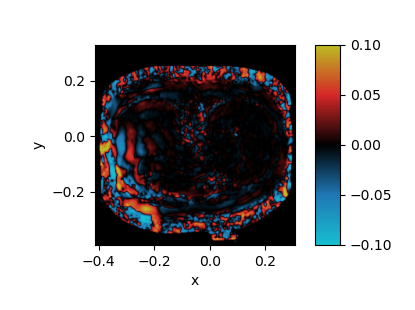

interactive(children=(SelectionSlider(description='part', options=(('real', 0), ('imag', 1)), value=0), Select…

  plt.gcf().tight_layout()



<IPython.core.display.Javascript object>


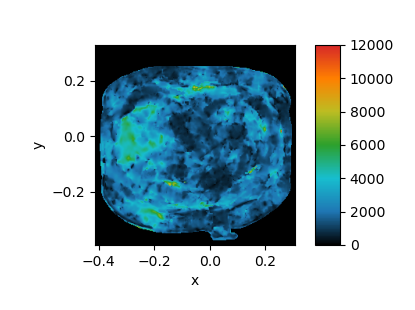

interactive(children=(SelectionSlider(description='part', options=(('real', 0), ('imag', 1)), value=0), Select…

  plt.gcf().tight_layout()



In [32]:
%autoreload

wave_kws = dict(vmin=-1e-1, vmax=1e-1, cmap=mre_pinn.visual.wave_color_map())
elast_kws = dict(vmin=0, vmax=12e3, cmap=mre_pinn.visual.mre_color_map(symmetric=False))

#example.view('anat', ax_height=2, space=0.2)
#plt.gcf().tight_layout()
#plt.savefig('images/patient_anat.png', dpi=200, bbox_inches='tight')

example.view('wave', ax_height=2, space=0.2, **wave_kws)
plt.gcf().tight_layout()
plt.savefig('images/patient_wave.png', dpi=200, bbox_inches='tight')

example.view('mre', ax_height=2, space=0.2, **elast_kws)
plt.gcf().tight_layout()
plt.savefig('images/patient_mre.png', dpi=200, bbox_inches='tight')

<IPython.core.display.Javascript object>


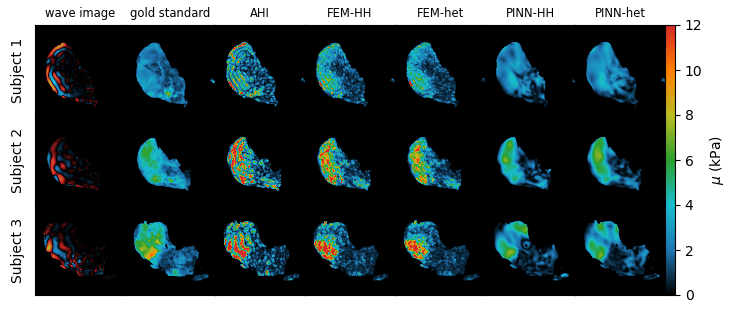

Loading ../data/NAFLD/v4/1337/wave.nc
Loading ../data/NAFLD/v4/1337/mre.nc
Loading ../data/NAFLD/v4/1337/mre_mask.nc
Loading 2023-2-28_patient_anat3/train_patient_1337_30_helmholtz_1e-02/train_patient_1337_30_helmholtz_1e-02_direct.nc
Loading 2023-2-28_patient_anat3/train_patient_1337_30_helmholtz_1e-02/train_patient_1337_30_helmholtz_1e-02_fem.nc
Loading 2023-3-2_patient_anat/train_patient_1337_30_hetero_1e-02/train_patient_1337_30_hetero_1e-02_fem.nc
Loading 2023-2-28_patient_anat3/train_patient_1337_30_helmholtz_1e-02/train_patient_1337_30_helmholtz_1e-02_elastogram.nc
Loading 2023-3-2_patient_anat/train_patient_1337_30_hetero_1e-02/train_patient_1337_30_hetero_1e-02_elastogram.nc
Loading ../data/NAFLD/v4/1039/wave.nc
Loading ../data/NAFLD/v4/1039/mre.nc
Loading ../data/NAFLD/v4/1039/mre_mask.nc
Loading 2023-2-28_patient_anat3/train_patient_1039_30_helmholtz_1e-02/train_patient_1039_30_helmholtz_1e-02_direct.nc
Loading 2023-2-28_patient_anat3/train_patient_1039_30_helmholtz_1e-02/tr

In [33]:
%autoreload
import mre_pinn

image_names = [
    'wave image', 'gold standard', 'AHI', 'FEM-HH', 'FEM-het', 'PINN-HH', 'PINN-het'
]

expt_name1 = '2023-2-28_patient_anat3' # Helmholtz
expt_name2 = '2023-3-2_patient_anat'   # hetero
name = 'train_patient_{example_id}_{omega}_{pde_name}_{a_loss_weight:.0e}'

def plot_image_grid(example_ids):
    n_rows = len(example_ids)
    n_cols = len(image_names)
    ax_width = 0.9
    ax_height = ax_width
    cbar_width = 0.1
    
    omega = 30
    a_loss_weight = 1e-2
    savgol_filter = 0

    fig, axes, cbar_ax = mre_pinn.visual.subplot_grid(
        n_rows, n_cols, ax_height, ax_width, cbar_width, space=0, pad=(0.35,0.55,0.15,0.25)
    )
    for row_idx, example_id in enumerate(example_ids):
        example = mre_pinn.data.MREExample.load_xarrays('../data/NAFLD/v4', example_id)
        z = example.mre.z[0]
        for col_idx, image_name in enumerate(image_names):
            ax = axes[row_idx,col_idx]
            #ax.text(0.1, 0.1, f'{row_idx}, {col_idx}')
            if col_idx == 0:
                ax.set_ylabel(f'Subject {row_idx+1}', fontsize='medium')
            if row_idx == 0:
                ax.set_title(image_name, fontsize='small')
            ax.set_yticks([])
            ax.set_xticks([])

            if image_name == 'wave image':
                array = example.wave[...,0]
                color_kws = wave_kws
                array = array.real * (example.mre_mask.values[...,0] > 0)

            elif image_name in {'ground truth', 'gold standard'}:
                array = example.mre[...,0]
                color_kws = elast_kws
                array = np.abs(array) * (example.mre_mask.values[...,0] > 0)

            elif image_name == 'AHI':
                job_name = name.format(
                    example_id=example_id, pde_name='helmholtz', omega=omega, a_loss_weight=a_loss_weight
                )
                nc_file = f'{expt_name1}/{job_name}/{job_name}_direct.nc'
                array = mre_pinn.data.dataset.load_xarray_file(nc_file).sel(variable='direct_pred', z=z)
                color_kws = elast_kws
                array = np.abs(array)
                
            elif image_name == 'FEM-HH':
                job_name = name.format(
                    example_id=example_id, pde_name='helmholtz', omega=omega, a_loss_weight=a_loss_weight
                )
                nc_file = f'{expt_name1}/{job_name}/{job_name}_fem.nc'
                array = mre_pinn.data.dataset.load_xarray_file(nc_file).sel(variable='fem_pred', z=z)
                color_kws = elast_kws
                array = np.abs(array)

            elif image_name == 'FEM-het':
                job_name = name.format(
                    example_id=example_id, pde_name='hetero', omega=omega, a_loss_weight=a_loss_weight
                )
                nc_file = f'{expt_name2}/{job_name}/{job_name}_fem.nc'
                array = mre_pinn.data.dataset.load_xarray_file(nc_file).sel(variable='fem_pred', z=z)
                color_kws = elast_kws
                array = np.abs(array)

            elif image_name == 'PINN-HH':
                job_name = name.format(
                    example_id=example_id, pde_name='helmholtz', omega=omega, a_loss_weight=a_loss_weight
                )
                nc_file = f'{expt_name1}/{job_name}/{job_name}_elastogram.nc'
                array = mre_pinn.data.dataset.load_xarray_file(nc_file).sel(variable='mu_pred', z=z)
                color_kws = elast_kws
                array = np.abs(array)

            elif image_name == 'PINN-het':
                job_name = name.format(
                    example_id=example_id, pde_name='hetero', omega=omega, a_loss_weight=a_loss_weight
                )
                nc_file = f'{expt_name2}/{job_name}/{job_name}_elastogram.nc'
                array = mre_pinn.data.dataset.load_xarray_file(nc_file).sel(variable='mu_pred', z=z)
                color_kws = elast_kws
                array = np.abs(array)
                
            elif image_name == 'PINN-HH-anat':
                job_name = name.format(
                    example_id=example_id, pde_name='helmholtz', omega=omega, a_loss_weight=a_loss_weight
                )
                nc_file = f'{pinn_expt_name}/{job_name}/{job_name}_elastogram.nc'
                array = mre_pinn.data.dataset.load_xarray_file(nc_file).sel(variable='mu_pred', z=z)
                color_kws = elast_kws
                array = np.abs(array)

            im = mre_pinn.visual.imshow(ax, array[15:-44,23:-36], **color_kws)

    plt.colorbar(im, cax=cbar_ax)
    cbar_ax.set_yticks([0, 2e3, 4e3, 6e3, 8e3, 10e3, 12e3])
    cbar_ax.set_yticklabels(['0', '2', '4', '6', '8', '10', '12'])
    cbar_ax.set_ylabel('$\mu$ (kPa)')
    
    return fig

#fig0 = plot_image_grid(['0006', '0020', '0024', '0029'])
#fig1 = plot_image_grid(['0043', '0047', '0126', '0135'])
#fig = plot_image_grid(['2029', '1948', '1940', '1839', '1791', '1671', '1448', '1435', '1045', '1039'])
fig = plot_image_grid(['1337', '1039', '0659'])

for ext in ['png', 'pdf']:
    fig.savefig(f'images/patient_image_grid.{ext}', bbox_inches='tight', dpi=200)
    pass

Loading ../data/NAFLD/v3/0006/wave.nc
Loading ../data/NAFLD/v3/0006/mre.nc
Loading ../data/NAFLD/v3/0006/mre_mask.nc


<IPython.core.display.Javascript object>


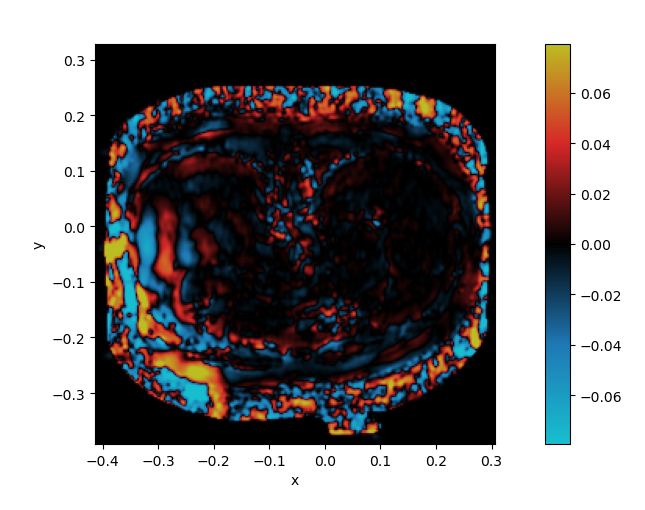

interactive(children=(SelectionSlider(description='part', options=(('real', 0), ('imag', 1)), value=0), Select…

<IPython.core.display.Javascript object>


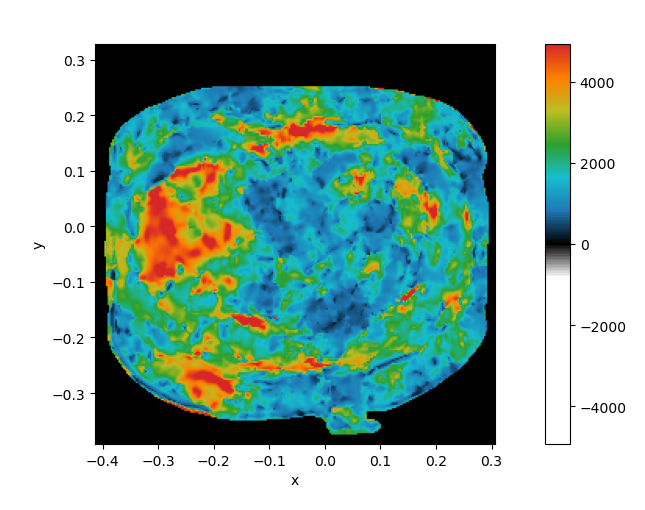

interactive(children=(SelectionSlider(description='part', options=(('real', 0), ('imag', 1)), value=0), Select…

<IPython.core.display.Javascript object>


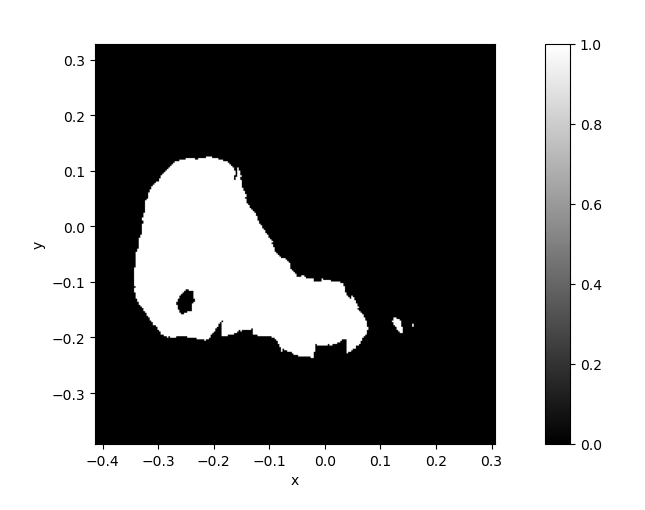

interactive(children=(SelectionSlider(description='part', options=(('real', 0), ('imag', 1)), value=0), Select…

In [34]:
example = mre_pinn.data.MREExample.load_xarrays('../data/NAFLD/v3', '0006')
example.view()

(256, 256, 4, 6)


<IPython.core.display.Javascript object>


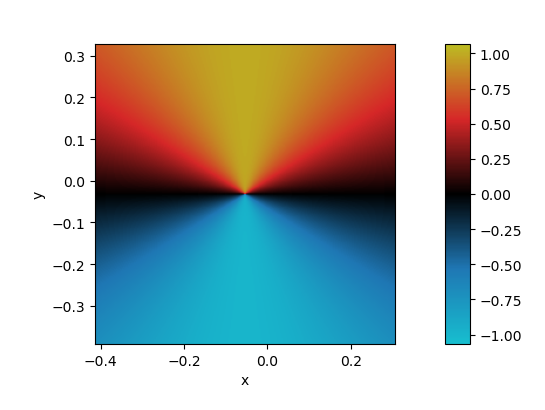

interactive(children=(SelectionSlider(description='part', options=(('real', 0), ('imag', 1)), value=0), Select…

In [35]:
import xarray as xr
u = example.wave
x = u.field.points(reshape=False)
x = (x - x.mean(axis=(0,1,2), keepdims=True)) / (x.max(axis=(0,1,2), keepdims=True) - x.min(axis=(0,1,2), keepdims=True))
x, y, z = x[...,0], x[...,1], x[...,2]
r = np.sqrt(x**2 + y**2)
sin = y / (r + 1e-3)
cos = x / (r + 1e-3)
x = np.stack([x, y, z, r, sin, cos], axis=-1)

print(x.shape)
x_dims = ['x', 'y', 'z', 'component']
x_coords = {
    'x': u.x,
    'y': u.y,
    'z': u.z,
    'component': ['x', 'y', 'z', 'r', 'sin', 'cos']
}
x = xr.DataArray(x, coords=x_coords, dims=x_dims)
x.name = 'position'
mre_pinn.visual.XArrayViewer(x, ax_height=3)

In [ ]:
example.wave.coords